# Prunning Methods

### Training and Testing

In [1]:
import torch 
import numpy as np
from torchvision import datasets, transforms
from neural_networks import Lenet5_Based_Model
from train import *
from prunning import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Runing in {device}")

Runing in cpu


In [3]:
torch.manual_seed(42)
nsamples = 50

transform = transforms.Compose([
    transforms.ToTensor() 
])

dataset1 = datasets.MNIST('../data', train=True, download=True,transform=transform)
dataset2 = datasets.MNIST('../data', train=False,transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,batch_size=nsamples, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2,batch_size=nsamples, shuffle=True)

In [4]:
model = Lenet5_Based_Model().to(device)

Batch 1:
Imagens (data): torch.Size([50, 1, 28, 28])
Rótulos (target): torch.Size([50])


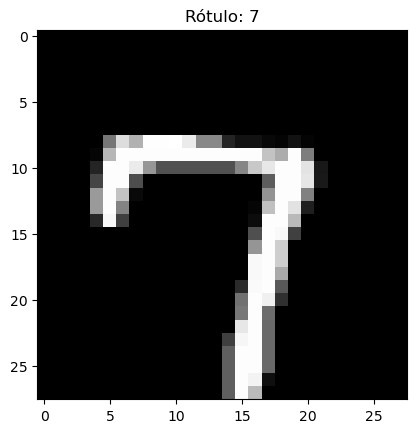

In [5]:
for batch_idx, (data, target) in enumerate(train_loader):
    print(f'Batch {batch_idx + 1}:')
    print('Imagens (data):', data.size())
    print('Rótulos (target):', target.size())


    plt.imshow(data[0].squeeze(), cmap='gray')
    plt.title(f'Rótulo: {target[0].item()}')
    plt.show()
    break

Train Epoch: 0 
 Loss: 2.318635940551758 
 Acurracy: 6.666666740784422e-05
Train Epoch: 50 
 Loss: 0.5258266925811768 
 Acurracy: 0.022749999538064003
Train Epoch: 100 
 Loss: 0.1965215802192688 
 Acurracy: 0.05963333323597908
Train Epoch: 150 
 Loss: 0.076575368642807 
 Acurracy: 0.09803333133459091
Train Epoch: 200 
 Loss: 0.22576943039894104 
 Acurracy: 0.13671666383743286
Train Epoch: 250 
 Loss: 0.19177186489105225 
 Acurracy: 0.17648333311080933
Train Epoch: 300 
 Loss: 0.21117816865444183 
 Acurracy: 0.21641667187213898
Train Epoch: 350 
 Loss: 0.1709216684103012 
 Acurracy: 0.25635001063346863
Train Epoch: 400 
 Loss: 0.03463544324040413 
 Acurracy: 0.2966499924659729
Train Epoch: 450 
 Loss: 0.21555742621421814 
 Acurracy: 0.3370499908924103
Train Epoch: 500 
 Loss: 0.025831537321209908 
 Acurracy: 0.3772999942302704
Train Epoch: 550 
 Loss: 0.5150388479232788 
 Acurracy: 0.4178333282470703
Train Epoch: 600 
 Loss: 0.2892397940158844 
 Acurracy: 0.4581499993801117
Train Epoch:

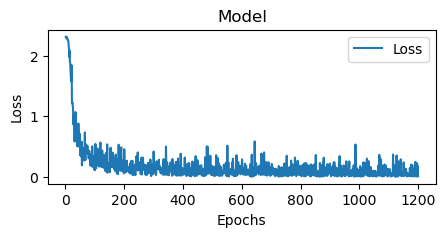

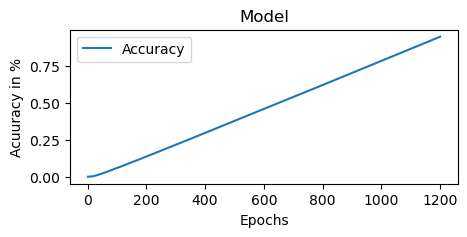

In [6]:
model_delta = model.state_dict()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
loss_items, final_epoch, acc_items = train(model,device,train_loader,optimizer)
loss_graph(loss_items,final_epoch)
accuracy_graph(acc_items,final_epoch)

In [7]:
test(model,device,test_loader)

Test Loss: 0.00140305859525688 
 Acurracy 0.9782


### Prunning 

In [8]:
mask = generate_mask(model)
print(mask)

[tensor([[[[ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True]]],


        [[[ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True]]],


        [[[ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True]]],


        [[[ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True]]],


        [[[ True,  True,  True,  True,  Tru

In [9]:
apply_mask(model,mask)

In [10]:
test(model,device,test_loader)

Test Loss: 0.0013774455156642944 
 Acurracy 0.9789


### Reseting the network and applying the mask

In [11]:
model.load_state_dict(model_delta)

<All keys matched successfully>

In [12]:
apply_mask(model,mask)

Train Epoch: 0 
 Loss: 0.030528241768479347 
 Acurracy: 0.0008333333535119891
Train Epoch: 50 
 Loss: 0.11800719052553177 
 Acurracy: 0.04163333401083946
Train Epoch: 100 
 Loss: 0.2580415606498718 
 Acurracy: 0.0825333297252655
Train Epoch: 150 
 Loss: 0.0036181085743010044 
 Acurracy: 0.12338333576917648
Train Epoch: 200 
 Loss: 0.10689622163772583 
 Acurracy: 0.164000004529953
Train Epoch: 250 
 Loss: 0.005060768220573664 
 Acurracy: 0.2048666626214981
Train Epoch: 300 
 Loss: 0.07053495198488235 
 Acurracy: 0.24566666781902313
Train Epoch: 350 
 Loss: 0.0063956803642213345 
 Acurracy: 0.2864166796207428
Train Epoch: 400 
 Loss: 0.014244836755096912 
 Acurracy: 0.32731667160987854
Train Epoch: 450 
 Loss: 0.033330049365758896 
 Acurracy: 0.3680500090122223
Train Epoch: 500 
 Loss: 0.009009170345962048 
 Acurracy: 0.40915000438690186
Train Epoch: 550 
 Loss: 0.128104105591774 
 Acurracy: 0.4500333368778229
Train Epoch: 600 
 Loss: 0.029341692104935646 
 Acurracy: 0.49079999327659607


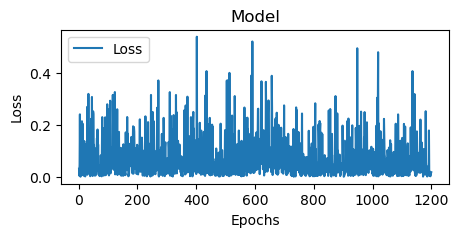

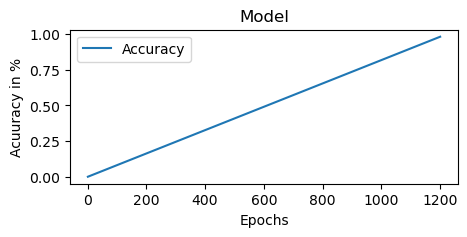

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
loss_items, final_epoch, acc_items = train(model,device,train_loader,optimizer)
loss_graph(loss_items,final_epoch)
accuracy_graph(acc_items,final_epoch)

In [14]:
test(model,device,test_loader)

Test Loss: 0.0010118263349519112 
 Acurracy 0.9849
